In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import heapq
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
file_name = 'NiTi-3D打印工艺参数_4_Phase.xlsx'
dataset = pd.read_excel(file_name, header=0)
dataset.head(5)

,P(W),V(mm/s),h(um),t(um),LED(J/mm),SED(J/mm2),VED(J/mm3),Ni,Ti,Dmin,...,ΔX(电负性),Tm(熔点),ΔH(混合焓),Ω(几何参数),٨(纯几何参数),VEC(价电子浓度),Ms(℃),Ms,Af(℃),Af
0,160.0,830.0,80.0,30,0.192771,2.409639,80.321285,50.8,49.2,15,...,0.18432,1570.796088,-34.743073,259.166234,3.677514,6.742965,34.5,307.65,62.6,335.75
1,160.0,1080.0,70.0,30,0.148148,2.116402,70.546737,50.8,49.2,15,...,0.18432,1570.796088,-34.743073,259.166234,3.677514,6.742965,32.5,305.65,57.8,330.95
2,120.0,330.0,130.0,30,0.363636,2.797203,93.240093,50.8,49.2,15,...,0.18432,1570.796088,-34.743073,259.166234,3.677514,6.742965,74.9,348.05,109.7,382.85
3,200.0,830.0,100.0,30,0.240964,2.409639,80.321285,50.8,49.2,15,...,0.18432,1570.796088,-34.743073,259.166234,3.677514,6.742965,36.7,309.85,60.9,334.05
4,65.0,297.0,100.0,30,0.218855,2.188552,72.951740,50.8,49.2,15,...,0.18432,1570.796088,-34.743073,259.166234,3.677514,6.742965,54.7,327.85,84.3,357.45


In [3]:
from sklearn.preprocessing import StandardScaler
columns=dataset.columns
standard_s2=StandardScaler()
datas=standard_s2.fit_transform(dataset.iloc[:, :])
datas=pd.DataFrame(datas,columns=columns[:])
datas = datas.drop(["Dmin", "Dmax", "Ni(mol%)", "Ti(mol%)"], axis = "columns")
datas

,P(W),V(mm/s),h(um),t(um),LED(J/mm),SED(J/mm2),VED(J/mm3),Ni,Ti,D10,...,ΔX(电负性),Tm(熔点),ΔH(混合焓),Ω(几何参数),٨(纯几何参数),VEC(价电子浓度),Ms(℃),Ms,Af(℃),Af
0,0.548498,0.519575,-0.585256,-0.499847,-0.435927,-0.251628,-0.162640,0.128238,-0.128238,0.102074,...,0.134191,-0.128049,-0.134170,-0.131537,-0.132152,0.128049,0.319463,0.319463,0.343838,0.343838
1,0.548498,1.212196,-1.022807,-0.499847,-0.719588,-0.390583,-0.304259,0.128238,-0.128238,0.102074,...,0.134191,-0.128049,-0.134170,-0.131537,-0.132152,0.128049,0.237840,0.237840,0.164058,0.164058
2,-0.147443,-0.865667,1.602501,-0.499847,0.650235,-0.067975,0.024536,0.128238,-0.128238,0.102074,...,0.134191,-0.128049,-0.134170,-0.131537,-0.132152,0.128049,1.968255,1.968255,2.107932,2.107932
3,1.244439,0.519575,0.289847,-0.499847,-0.129574,-0.251628,-0.162640,0.128238,-0.128238,0.102074,...,0.134191,-0.128049,-0.134170,-0.131537,-0.132152,0.128049,0.409249,0.409249,0.280166,0.280166
4,-1.104362,-0.957093,0.289847,-0.499847,-0.270114,-0.356393,-0.269414,0.128238,-0.128238,0.102074,...,0.134191,-0.128049,-0.134170,-0.131537,-0.132152,0.128049,1.143859,1.143859,1.156595,1.156595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,-1.313145,-0.984798,0.727398,-1.393513,-0.487431,-0.597942,-0.353439,0.395274,-0.395274,0.853419,...,0.297219,-0.398026,-0.298481,-0.343198,-0.330965,0.398026,-0.272306,-0.272306,-0.420228,-0.420228
173,-1.139159,-0.522127,0.727398,-1.393513,-0.779225,-0.795684,-0.595281,0.395274,-0.395274,0.853419,...,0.297219,-0.398026,-0.298481,-0.343198,-0.330965,0.398026,-0.496770,-0.496770,-0.513863,-0.513863
174,-0.965174,-0.123177,0.727398,-1.393513,-0.885339,-0.867595,-0.683229,0.395274,-0.395274,0.853419,...,0.297219,-0.398026,-0.298481,-0.343198,-0.330965,0.398026,-0.435553,-0.435553,-0.528845,-0.528845
175,-0.791189,0.225903,0.727398,-1.393513,-0.932588,-0.899614,-0.722389,0.395274,-0.395274,0.853419,...,0.297219,-0.398026,-0.298481,-0.343198,-0.330965,0.398026,-0.831426,-0.831426,-0.536336,-0.536336


d:\Conda\envs\ML\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 1640 (\N{ARABIC-INDIC DIGIT EIGHT}) missing from current font.
  fig.canvas.draw()
d:\Conda\envs\ML\lib\site-packages\seaborn\utils.py:80: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.draw()
d:\Conda\envs\ML\lib\site-packages\seaborn\utils.py:658: UserWarning: Glyph 1640 (\N{ARABIC-INDIC DIGIT EIGHT}) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
d:\Conda\envs\ML\lib\site-packages\seaborn\utils.py:658: UserWarning: Matplotlib currently does not support Arabic natively.
  bboxes = [l.get_window_extent() for l in labels]


<AxesSubplot:>

d:\Conda\envs\ML\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 1640 (\N{ARABIC-INDIC DIGIT EIGHT}) missing from current font.
  func(*args, **kwargs)
d:\Conda\envs\ML\lib\site-packages\IPython\core\events.py:89: UserWarning: Matplotlib currently does not support Arabic natively.
  func(*args, **kwargs)
d:\Conda\envs\ML\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 1640 (\N{ARABIC-INDIC DIGIT EIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Conda\envs\ML\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


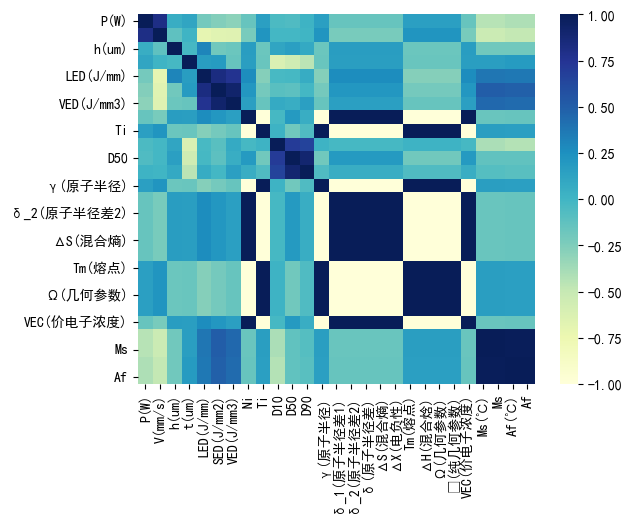

In [4]:
#热力图展示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(round(datas.corr(method='spearman'), 2),cmap="YlGnBu")

<AxesSubplot:>

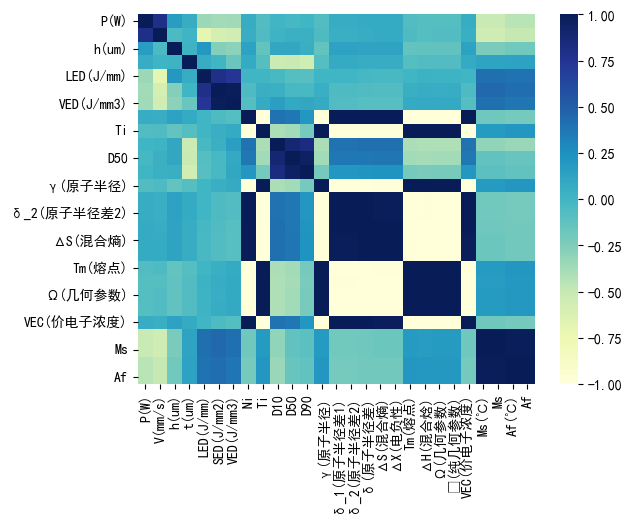

In [5]:
#热力图展示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(round(datas.corr(method='pearson'), 2),cmap="YlGnBu")

In [6]:
datas.corr(method='spearman')

,P(W),V(mm/s),h(um),t(um),LED(J/mm),SED(J/mm2),VED(J/mm3),Ni,Ti,D10,...,ΔX(电负性),Tm(熔点),ΔH(混合焓),Ω(几何参数),٨(纯几何参数),VEC(价电子浓度),Ms(℃),Ms,Af(℃),Af
P(W),1.000000,0.806507,0.058891,0.110487,-0.212672,-0.258769,-0.294943,-0.145136,0.145136,-0.038942,...,-0.145136,0.145136,0.145136,0.145136,0.145136,-0.145136,-0.444032,-0.444032,-0.408293,-0.408293
V(mm/s),0.806507,1.000000,-0.117337,0.005497,-0.695035,-0.655989,-0.651787,-0.222093,0.222093,-0.007988,...,-0.222093,0.222093,0.222093,0.222093,0.222093,-0.222093,-0.526765,-0.526765,-0.494744,-0.494744
h(um),0.058891,-0.117337,1.000000,-0.021094,0.305111,-0.185674,-0.171884,0.168278,-0.168278,0.110930,...,0.168278,-0.168278,-0.168278,-0.168278,-0.168278,0.168278,-0.194548,-0.194548,-0.189484,-0.189484
t(um),0.110487,0.005497,-0.021094,1.000000,0.166677,0.184934,-0.150588,0.157480,-0.157480,-0.617276,...,0.157480,-0.157480,-0.157480,-0.157480,-0.157480,0.157480,0.162569,0.162569,0.176760,0.176760
LED(J/mm),-0.212672,-0.695035,0.305111,0.166677,1.000000,0.830104,0.764662,0.268863,-0.268863,-0.030322,...,0.268863,-0.268863,-0.268863,-0.268863,-0.268863,0.268863,0.380666,0.380666,0.367342,0.367342
SED(J/mm2),-0.258769,-0.655989,-0.185674,0.184934,0.830104,1.000000,0.921863,0.210680,-0.210680,-0.103065,...,0.210680,-0.210680,-0.210680,-0.210680,-0.210680,0.210680,0.495236,0.495236,0.487385,0.487385
VED(J/mm3),-0.294943,-0.651787,-0.171884,-0.150588,0.764662,0.921863,1.000000,0.152939,-0.152939,0.079040,...,0.152939,-0.152939,-0.152939,-0.152939,-0.152939,0.152939,0.448991,0.448991,0.433595,0.433595
Ni,-0.145136,-0.222093,0.168278,0.157480,0.268863,0.210680,0.152939,1.000000,-1.000000,-0.024065,...,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-0.158728,-0.158728,-0.145270,-0.145270
Ti,0.145136,0.222093,-0.168278,-0.157480,-0.268863,-0.210680,-0.152939,-1.000000,1.000000,0.024065,...,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.158728,0.158728,0.145270,0.145270
D10,-0.038942,-0.007988,0.110930,-0.617276,-0.030322,-0.103065,0.079040,-0.024065,0.024065,1.000000,...,-0.024065,0.024065,0.024065,0.024065,0.024065,-0.024065,-0.395339,-0.395339,-0.426082,-0.426082


In [7]:
correlation_matrix = datas.corr(method='spearman')
# 定义要筛选的相关系数阈值（例如，大于0.8）
threshold = 0.2
# 根据条件筛选相关系数满足要求的特征对
filtered_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            filtered_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# 打印筛选后的相关系数满足要求的特征对
for feature1, feature2, correlation in filtered_pairs:
    print(f"{feature1} 和 {feature2} 的皮尔逊相关系数为 {correlation:.4f}")

P(W) 和 V(mm/s) 的皮尔逊相关系数为 0.8065
P(W) 和 LED(J/mm) 的皮尔逊相关系数为 -0.2127
P(W) 和 SED(J/mm2) 的皮尔逊相关系数为 -0.2588
P(W) 和 VED(J/mm3) 的皮尔逊相关系数为 -0.2949
P(W) 和 Ms(℃) 的皮尔逊相关系数为 -0.4440
P(W) 和 Ms 的皮尔逊相关系数为 -0.4440
P(W) 和 Af(℃) 的皮尔逊相关系数为 -0.4083
P(W) 和 Af 的皮尔逊相关系数为 -0.4083
V(mm/s) 和 LED(J/mm) 的皮尔逊相关系数为 -0.6950
V(mm/s) 和 SED(J/mm2) 的皮尔逊相关系数为 -0.6560
V(mm/s) 和 VED(J/mm3) 的皮尔逊相关系数为 -0.6518
V(mm/s) 和 Ni 的皮尔逊相关系数为 -0.2221
V(mm/s) 和 Ti 的皮尔逊相关系数为 0.2221
V(mm/s) 和 γ(原子半径) 的皮尔逊相关系数为 0.2221
V(mm/s) 和 δ_1(原子半径差1) 的皮尔逊相关系数为 -0.2221
V(mm/s) 和 δ_2(原子半径差2) 的皮尔逊相关系数为 -0.2221
V(mm/s) 和 δ(原子半径差) 的皮尔逊相关系数为 -0.2221
V(mm/s) 和 ΔS(混合熵) 的皮尔逊相关系数为 -0.2221
V(mm/s) 和 ΔX(电负性) 的皮尔逊相关系数为 -0.2221
V(mm/s) 和 Tm(熔点) 的皮尔逊相关系数为 0.2221
V(mm/s) 和 ΔH(混合焓) 的皮尔逊相关系数为 0.2221
V(mm/s) 和 Ω(几何参数) 的皮尔逊相关系数为 0.2221
V(mm/s) 和 ٨(纯几何参数) 的皮尔逊相关系数为 0.2221
V(mm/s) 和 VEC(价电子浓度) 的皮尔逊相关系数为 -0.2221
V(mm/s) 和 Ms(℃) 的皮尔逊相关系数为 -0.5268
V(mm/s) 和 Ms 的皮尔逊相关系数为 -0.5268
V(mm/s) 和 Af(℃) 的皮尔逊相关系数为 -0.4947
V(mm/s) 和 Af 的皮尔逊相关系数为 -0.4947
h(um) 和 LED(J/mm) 的皮尔逊相关系数为 0.305

d:\Conda\envs\ML\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.draw()
d:\Conda\envs\ML\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  fig.canvas.draw()
d:\Conda\envs\ML\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 21322 (\N{CJK UNIFIED IDEOGRAPH-534A}) missing from current font.
  fig.canvas.draw()
d:\Conda\envs\ML\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 24452 (\N{CJK UNIFIED IDEOGRAPH-5F84}) missing from current font.
  fig.canvas.draw()
d:\Conda\envs\ML\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from current font.
  fig.canvas.draw()
d:\Conda\envs\ML\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from current font.
  fig.canvas.draw()
d:\Conda\envs\ML\lib\site-packages

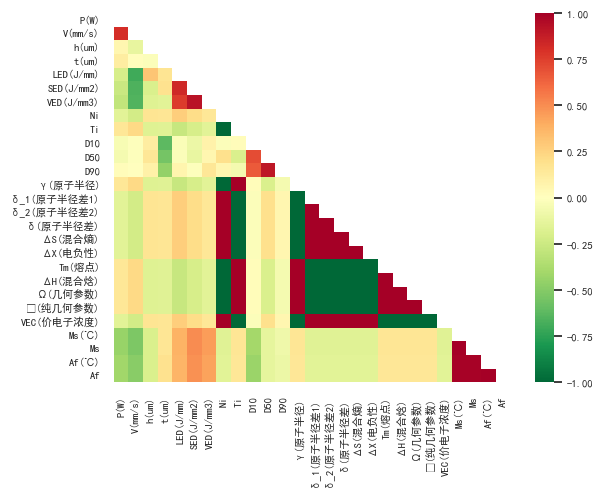

In [8]:
sns.set_theme(style="whitegrid",font='Times New Roman',font_scale=0.7)

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
 # 设置展示一半，如果不需要注释掉mask即可
mask=np.zeros_like(round(datas.corr(method='spearman'), 2))
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    sns.heatmap(round(datas.corr(method='spearman'), 2),cmap="RdYlGn_r",mask=mask)

In [9]:

from sklearn.preprocessing import StandardScaler
file_name = 'NiTi-3D打印工艺参数_4_Phase.xlsx'

dataset = pd.read_excel(file_name, header=0)

#print(dataset)
x1 = dataset['P(W)'].values
x2 = dataset['V(mm/s)'].values
x3 = dataset['h(um)'].values
x4 = dataset['t(um)'].values
x5 = dataset['LED(J/mm)'].values
x6 = dataset['SED(J/mm2)'].values
x7 = dataset['VED(J/mm3)'].values
x8 = dataset['Ni'].values
x9 = dataset['Ti'].values
# x10 = dataset['Dmin'].values
# x11 = dataset['Dmax'].values
x12 = dataset['D10'].values
x13 = dataset['D50'].values
x14 = dataset['D90'].values
x15 = dataset['γ(原子半径)'].values
x16 = dataset['δ(原子半径差)'].values
x17 = dataset['ΔS(混合熵)'].values
x18 = dataset['ΔX(电负性)'].values
x19 = dataset['Tm(熔点)'].values
x20 = dataset['ΔH(混合焓)'].values
x21 = dataset['Ω(几何参数)'].values
x22 = dataset['٨(纯几何参数)'].values
x23 = dataset['VEC(价电子浓度)'].values

y1 = dataset['Ms'].values
y2 = dataset['Af'].values
X = np.column_stack((x1.reshape(-1, 1), 
                     x2.reshape(-1, 1), 
                     x3.reshape(-1, 1),
                     x4.reshape(-1, 1), 
                     x5.reshape(-1, 1),
                     x6.reshape(-1, 1),
                     x7.reshape(-1, 1),
                     x8.reshape(-1, 1),
                     x9.reshape(-1, 1),
                    #  x10.reshape(-1, 1),
                    #  x11.reshape(-1, 1),
                     x12.reshape(-1, 1),
                     x13.reshape(-1, 1),
                     x14.reshape(-1, 1),
                     x15.reshape(-1, 1),
                     x16.reshape(-1, 1),
                     x17.reshape(-1, 1),
                     x18.reshape(-1, 1),
                     x19.reshape(-1, 1),
                     x20.reshape(-1, 1),
                     x21.reshape(-1, 1),
                     x22.reshape(-1, 1),
                     x23.reshape(-1, 1)))
Y = np.column_stack((y1,y2))
Y = Y.round(0)


In [10]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# # 导入示例数据集（波士顿房价数据集）
# boston = load_boston()
# X = boston.data
# y = boston.target
feature_names = ["P(W)", "V(mm/s)", "h(um)", "t(um)",	"LED(J/mm)", "SED(J/mm2)",
           "VED(J/mm3)", "Ni(at.%)", "Ti(at.%)", "Dmin", "Dmax", "D10",	"D50", "D90","γ", "δ", 
           "ΔS", "ΔX", "Tm", "ΔH", "Ω",	"٨",
           "VEC"]
data = {'size':[],
            'MSE':[],
            'R2':[]}
for i in range(23):
    print("**********{}**********".format(i+1))
    # 划分数据集为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # 创建随机森林回归模型
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # 创建RFE对象并指定模型
    num_features_to_select = i+1  # 选择要保留的特征数量
    rfe = RFE(estimator=rf_model, n_features_to_select=num_features_to_select)

    # 使用RFE进行递归特征消除
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    # 训练随机森林模型
    rf_model.fit(X_train_rfe, y_train)

    # 预测
    y_pred = rf_model.predict(X_test_rfe)

    # 评估模型性能
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("选择的特征矩阵的形状:", X_train_rfe.shape)
    print("均方误差 (MSE):", mse)
    print("决定系数 (R-squared):", r2)

    # 获取所选特征的掩码
    feature_mask = rfe.support_

    # 获取特征排名
    feature_ranking = rfe.ranking_

    # 打印所选特征
    selected_features = np.where(feature_mask)[0]
    print(f"所选的特征索引：{selected_features}")

    # # 绘制特征重要性的图表
    # feature_importances = rf_model.feature_importances_
    # plt.figure(figsize=(10, 6))
    # plt.bar(range(X.shape[1]), feature_importances, align='center')
    # plt.xticks(range(X.shape[1]), feature_names, rotation=90)
    # plt.xlabel('特征')
    # plt.ylabel('重要性')
    # plt.title('特征重要性')
    # plt.show()


**********1**********
选择的特征矩阵的形状: (141, 1)
均方误差 (MSE): 503.38411029101877
决定系数 (R-squared): 0.061026851998752185
所选的特征索引：[1]
**********2**********
选择的特征矩阵的形状: (141, 2)
均方误差 (MSE): 213.8599683560791
决定系数 (R-squared): 0.6015641063257784
所选的特征索引：[1 9]
**********3**********
选择的特征矩阵的形状: (141, 3)
均方误差 (MSE): 215.4972009195224
决定系数 (R-squared): 0.5978126518117647
所选的特征索引：[1 6 9]
**********4**********
选择的特征矩阵的形状: (141, 4)
均方误差 (MSE): 88.90636275949169
决定系数 (R-squared): 0.8343651276768126
所选的特征索引：[ 1  6  9 18]
**********5**********
选择的特征矩阵的形状: (141, 5)
均方误差 (MSE): 77.82869097042497
决定系数 (R-squared): 0.855265497301736
所选的特征索引：[ 0  1  6  9 18]
**********6**********
选择的特征矩阵的形状: (141, 6)
均方误差 (MSE): 79.74627031784019
决定系数 (R-squared): 0.851802730507955
所选的特征索引：[ 0  1  5  6  9 18]
**********7**********
选择的特征矩阵的形状: (141, 7)
均方误差 (MSE): 79.6533808246281
决定系数 (R-squared): 0.8519347245329025
所选的特征索引：[ 0  1  5  6  9 18 19]
**********8**********
选择的特征矩阵的形状: (141, 8)
均方误差 (MSE): 70.31641837748623
决定系数 (R-s

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# # 创建示例数据集
# X = np.random.rand(100, 5)  # 特征矩阵，100个样本，5个特征
# y = 2 * X[:, 0] + 3 * X[:, 1] + 0.5 * X[:, 2] + np.random.rand(100)  # 示例回归目标
data = {'size':[],
            'MSE':[],
            'R2':[]}
for i in range(23):
    print("********{}********".format(i+1))
    
    # 划分数据集为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # 创建随机森林回归模型
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # 创建RFE对象并指定模型
    num_features_to_select = i+1  # 选择要保留的特征数量
    rfe = RFE(estimator=rf_model, n_features_to_select=num_features_to_select)

    # 使用RFE进行递归特征消除
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    # 训练随机森林模型
    rf_model.fit(X_train_rfe, y_train)

    # 预测
    y_pred = rf_model.predict(X_test_rfe)

    # 评估模型性能
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("选择的特征矩阵的形状:", X_train_rfe.shape)
    print("均方误差 (MSE):", mse)
    print("决定系数 (R-squared):", r2)
    data['size'].append(i+1)
    data['MSE'].append(mse)
    data['R2'].append(r2)
 
# # 创建一个 DataFrame 对象
# df = pd.DataFrame(data)    
# # 将数据写入 Excel 文件
# excel_file_path = 'sample_data.xlsx'  # 指定 Excel 文件路径和名称
# df.to_excel(excel_file_path, index=False)  # index=False 表示不将行索引写入 Excel 文件

# print(f"数据已写入 {excel_file_path}")


********1********
选择的特征矩阵的形状: (141, 1)
均方误差 (MSE): 503.38411029101877
决定系数 (R-squared): 0.061026851998752185
********2********
选择的特征矩阵的形状: (141, 2)
均方误差 (MSE): 213.8599683560791
决定系数 (R-squared): 0.6015641063257784
********3********
选择的特征矩阵的形状: (141, 3)
均方误差 (MSE): 215.4972009195224
决定系数 (R-squared): 0.5978126518117647
********4********
选择的特征矩阵的形状: (141, 4)
均方误差 (MSE): 88.90636275949169
决定系数 (R-squared): 0.8343651276768126
********5********
选择的特征矩阵的形状: (141, 5)
均方误差 (MSE): 77.82869097042497
决定系数 (R-squared): 0.855265497301736
********6********
选择的特征矩阵的形状: (141, 6)
均方误差 (MSE): 79.74627031784019
决定系数 (R-squared): 0.851802730507955
********7********
选择的特征矩阵的形状: (141, 7)
均方误差 (MSE): 79.6533808246281
决定系数 (R-squared): 0.8519347245329025
********8********
选择的特征矩阵的形状: (141, 8)
均方误差 (MSE): 70.31641837748623
决定系数 (R-squared): 0.8693855359746956
********9********
选择的特征矩阵的形状: (141, 9)
均方误差 (MSE): 74.50689010555018
决定系数 (R-squared): 0.8615565484189773
********10********
选择的特征矩阵的形状: (141, 10)
均方误差 

21
P(W): 0.0762
V(mm/s): 0.3042
h(um): 0.0455
t(um): 0.0164
LED(J/mm): 0.0338
SED(J/mm2): 0.0525
VED(J/mm3): 0.1226
Ni(at.%): 0.0153
Ti(at.%): 0.0072
D10: 0.1806
D50: 0.0136
D90: 0.0228
γ: 0.0108
δ: 0.0115
ΔS: 0.0197
ΔX: 0.0068
Tm: 0.0120
ΔH: 0.0135
Ω: 0.0099
٨: 0.0130
VEC: 0.0122


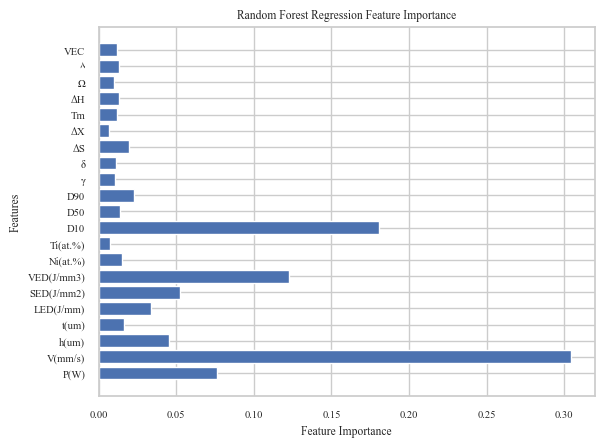

In [12]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# # 创建示例数据集
# from sklearn.datasets import load_boston
# boston = load_boston()
# X = boston.data
# y = boston.target
feature_names = ["P(W)", "V(mm/s)", "h(um)", "t(um)",	"LED(J/mm)", "SED(J/mm2)",
           "VED(J/mm3)", "Ni(at.%)", "Ti(at.%)", 
        #    "Dmin", "Dmax", 
           "D10",	"D50", "D90","γ", "δ", 
           "ΔS", "ΔX", "Tm", "ΔH", "Ω",	"٨",
           "VEC"]
print(len(feature_names))
# 创建随机森林回归模型
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
regressor.fit(X, Y)

# 获取特征重要性分数
feature_importances = regressor.feature_importances_

# 打印特征重要性分数
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance:.4f}")

# 可视化特征重要性
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regression Feature Importance')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from time import time

from sklearn.datasets import load_digits
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Utility function to report best scores+timings
def report_perf(optimizer, X, y, title):
    optimizer.fit(X, y)
    print(title, "best CV score:", optimizer.best_score_)

# get some data
digits = load_digits()
X, y = digits.data, digits.target
#define partitioning
skf = StratifiedKFold(n_splits=5,random_state=22)
# build a base classifier
clf = RandomForestClassifier(n_estimators=20,random_state=32)

total_iter = 40

for baseEstimator in ['GP','RF','ET']:
    opt = BayesSearchCV(clf,
        {"max_depth": Categorical([3, None]),
                  "max_features": (1, 10),
                  "min_samples_split": (2, 10),
                  "min_samples_leaf": (1, 10),
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]},
        n_iter=total_iter,n_jobs=-1,cv=skf,return_train_score=False,optimizer_kwargs={'base_estimator': baseEstimator})
    report_perf(opt, X, y,'BayesSearchCV_'+baseEstimator)

random_search = RandomizedSearchCV(clf, param_distributions={"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]},n_iter=total_iter,n_jobs=-1,cv=skf,
                                   return_train_score=False)
report_perf(random_search, X, y,'RandomizedSearchCV')

grid_search = GridSearchCV(clf, param_grid={"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]},n_jobs=-1,cv=skf,return_train_score=False)
report_perf(grid_search, X, y,'GridSearchCV')